# Plot footprints for TF pair locations

## Calculate TF positions from motifs

We calculate the location of TFBS by scanning the genome for motif positions, and run market basket analysis to find co-occurring TFs:

In [1]:
import tfcomb
C = tfcomb.CombObj()
C.TFBS_from_motifs(regions="../data/GM12878_hg38_chr4_ATAC_peaks.bed", 
                   motifs="../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../data/hg38_chr4_masked.fa.gz", 
                   resolve_overlapping="highest_score",
                   motif_pvalue=5e-05,
                   threads=4)

INFO: Scanning for TFBS with 4 thread(s)...
INFO: Progress: 10%
INFO: Progress: 21%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 91%
INFO: Finished!
INFO: Processing scanned TFBS
INFO: Identified 336722 TFBS (401 unique names) within given regions


In [2]:
C.count_within(threads=4)
C.market_basket()
C.simplify_rules()

INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 12%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 42%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 72%
INFO: Progress: 82%
INFO: Progress: 90%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [3]:
C.rules.head(10)

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,3323,2877,3415,1.060144,91.794181
SP2-SP3,SP2,SP3,3191,3415,2891,1.015564,93.100144
SP1-SP3,SP1,SP3,2640,2877,2891,0.915398,99.371057
PATZ1-SP2,PATZ1,SP2,2776,3237,3415,0.834935,76.407190
KLF3-SP2,KLF3,SP2,2254,2155,3415,0.830874,95.606695
SP2-WT1,SP2,WT1,2666,3415,3163,0.811176,65.990438
KLF6-SP2,KLF6,SP2,2375,2557,3415,0.803717,84.420823
SP2-THAP1,SP2,THAP1,1779,3415,1444,0.801119,78.441254
SP2-SP4,SP2,SP4,2247,3415,2431,0.779857,88.228572
KLF3-SP3,KLF3,SP3,1910,2155,2891,0.765219,75.631093


## Obtain locations of pairs 

In [4]:
pairs = C.get_pair_locations("PATZ1","SP2")

In [5]:
len(pairs)

2776

## Plot pair footprints

In [6]:
pairs._bigwig_path = "../data/GM12878_corrected.bw"

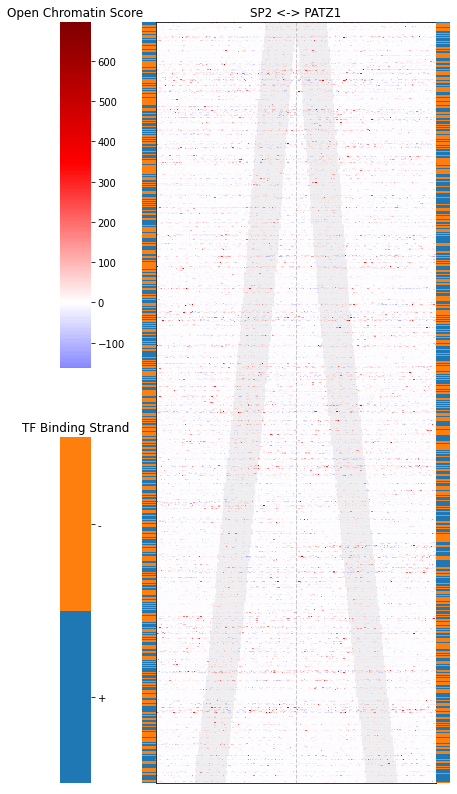

GridSpec(1, 2, width_ratios=[1, 10])

In [7]:
pairs.pairMap()

/home/mbentse/.conda/envs/py3/lib/python3.7/site-packages/tfcomb/utils.py:364: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  matplotlib.colors.SymLogNorm.__init__(self, lin_thres, lin_scale, vmin, vmax)


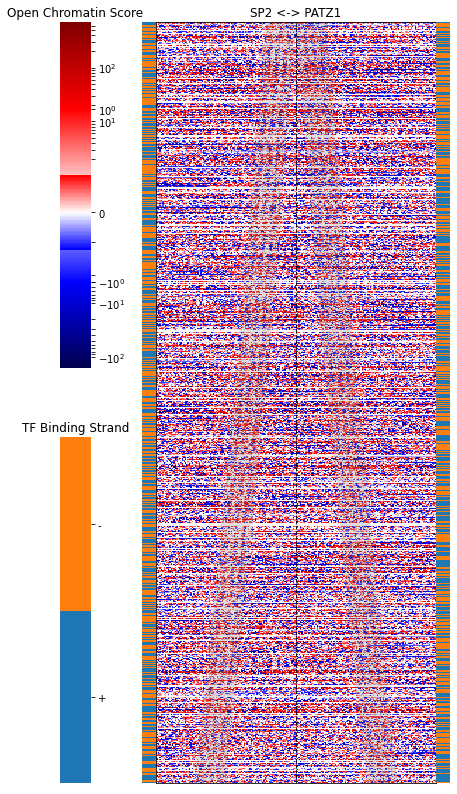

GridSpec(1, 2, width_ratios=[1, 10])

In [8]:
pairs.pairMap(logNorm_cbar="centerLogNorm")

In [9]:
pairs.pairTrackAnimation()

Render animation: 100%|██████████| 102/102 [00:08<00:00, 11.92it/s]


limit_output extension: Maximum message size of 1000000 exceeded with 3469408 characters

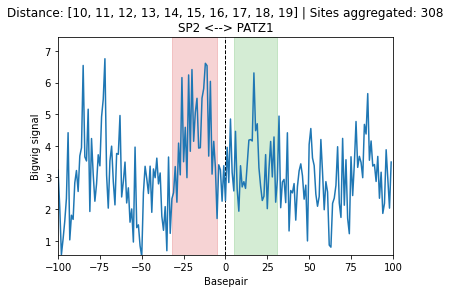

In [10]:
_ = pairs.pairTrack(dist=list(range(10,20)))